In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals
import pickle

from Consensus import *
from dynamics import *

In [8]:
def sim_ws(n_probs,N=100, av_degree =6):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        CS = Consensus_Simulation(GWS,distributed,L)
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

In [3]:
def ws_fiedler(n_probs,N=100, av_degree =6):
    F = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0,1,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        v = eigvals(L)
        v=np.delete(v,np.where(v==min(v)))
        F[i]=min(v)
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return F

In [4]:
def sim_ws_rt(n_probs,N=100, av_degree =6):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0.1,0.75,n_probs):
        k = int(av_degree/2)
        GWS = nx.watts_strogatz_graph(N, k, 1, seed=None)
        while(not nx.is_connected(GWS)):
            GWS = nx.watts_strogatz_graph(N, k, 1, seed=None)

        L = nx.laplacian_matrix(GWS)
        L=L.todense()

        CS = Consensus_Simulation(GWS,distributed_random_topology,(GWS,p))
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

In [9]:
def sim_er(n_probs,N=100):
    Time = np.zeros(n_probs)
    i=0
    t1 = time.time()
    for p in np.linspace(0.1,1,n_probs):
        ER = nx.gnp_random_graph(N, p, seed=None)
        while(not nx.is_connected(ER)):
            ER = nx.gnp_random_graph(N, p, seed=None)
        L = nx.laplacian_matrix(ER)
        L=L.todense()

        CS = Consensus_Simulation(ER,distributed,(L,1))
        CS.run_sim()

        Time[i] = CS.T[-1]
        i=i+1
    print("Iteration done!")
    t2 =time.time()
    print("Iteration time: ",round(t2-t1,3), " seconds")
    return Time

Iteration done!
Iteration time:  303.27  seconds
Iteration done!
Iteration time:  319.736  seconds
Iteration done!
Iteration time:  258.615  seconds
Iteration done!
Iteration time:  258.767  seconds
Iteration done!
Iteration time:  248.925  seconds
Iteration done!
Iteration time:  296.003  seconds
Iteration done!
Iteration time:  286.541  seconds
Iteration done!
Iteration time:  287.481  seconds
Iteration done!
Iteration time:  289.067  seconds
Iteration done!
Iteration time:  261.866  seconds
Iteration done!
Iteration time:  278.313  seconds
Iteration done!
Iteration time:  236.472  seconds
Iteration done!
Iteration time:  278.195  seconds
Iteration done!
Iteration time:  291.125  seconds
Iteration done!
Iteration time:  287.547  seconds
Iteration done!
Iteration time:  264.569  seconds
Iteration done!
Iteration time:  273.954  seconds
Iteration done!
Iteration time:  267.357  seconds
Iteration done!
Iteration time:  295.424  seconds
Iteration done!
Iteration time:  279.563  seconds
I

NameError: name 'N' is not defined

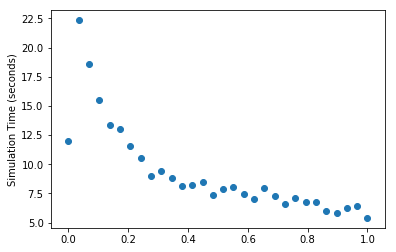

In [3]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim(n_probs)

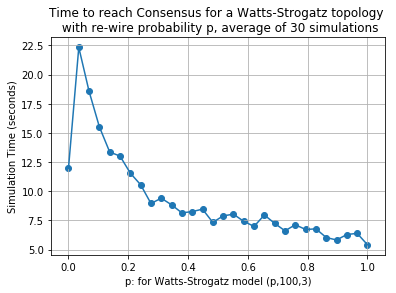

In [10]:
plt.scatter(np.linspace(0,1,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0,1,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("p: for Watts-Strogatz model (p,{0},{1})".format(100,3))
plt.title("Time to reach Consensus for a Watts-Strogatz topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()

plt.savefig("WS-Consensus time",bbpx_inches='tight')

In [15]:
import pickle
Results_ws_30 = {"Time":Time, "Prob": np.linspace(0,1,len(Time[0]))}
pickle.dump(Results_ws_30, open("ws_30","wb"))

In [ ]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim_er(n_probs)

Iteration done!
Iteration time:  0.724  seconds
Iteration done!
Iteration time:  0.632  seconds
Iteration done!
Iteration time:  0.669  seconds
Iteration done!
Iteration time:  0.61  seconds
Iteration done!
Iteration time:  0.615  seconds
Iteration done!
Iteration time:  0.71  seconds
Iteration done!
Iteration time:  0.67  seconds
Iteration done!
Iteration time:  0.664  seconds
Iteration done!
Iteration time:  0.619  seconds
Iteration done!
Iteration time:  0.706  seconds
Iteration done!
Iteration time:  0.667  seconds
Iteration done!
Iteration time:  0.733  seconds
Iteration done!
Iteration time:  0.668  seconds
Iteration done!
Iteration time:  0.648  seconds
Iteration done!
Iteration time:  0.632  seconds
Iteration done!
Iteration time:  0.662  seconds
Iteration done!
Iteration time:  0.64  seconds
Iteration done!
Iteration time:  0.716  seconds


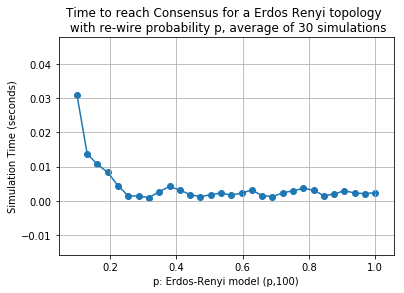

In [87]:
plt.scatter(np.linspace(0.1,1,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0.1,1,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("p: Erdos-Renyi model (p,{0})".format(100))
plt.title("Time to reach Consensus for a Erdos Renyi topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()

plt.savefig("ER-Consensus time",bbpx_inches='tight')

Results_er_30 = {"Time":Time, "Prob": np.linspace(0.1,1,len(Time[0]))}
pickle.dump(Results_er_30, open("er_30","wb"))

In [60]:
n_iterations=30
n_probs=30
Time = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    Time[i,:] = sim_ws_rt(n_probs)

Iteration done!
Iteration time:  164.24  seconds
Iteration done!
Iteration time:  157.294  seconds
Iteration done!
Iteration time:  156.813  seconds
Iteration done!
Iteration time:  156.842  seconds
Iteration done!
Iteration time:  155.736  seconds
Iteration done!
Iteration time:  155.649  seconds
Iteration done!
Iteration time:  155.401  seconds
Iteration done!
Iteration time:  156.427  seconds
Iteration done!
Iteration time:  156.274  seconds
Iteration done!
Iteration time:  155.424  seconds
Iteration done!
Iteration time:  155.509  seconds
Iteration done!
Iteration time:  155.982  seconds
Iteration done!
Iteration time:  155.713  seconds
Iteration done!
Iteration time:  156.134  seconds
Iteration done!
Iteration time:  156.208  seconds
Iteration done!
Iteration time:  155.732  seconds
Iteration done!
Iteration time:  155.984  seconds
Iteration done!
Iteration time:  155.763  seconds
Iteration done!
Iteration time:  156.101  seconds
Iteration done!
Iteration time:  155.231  seconds
I

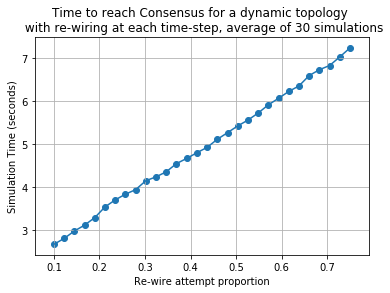

In [67]:
plt.scatter(np.linspace(0.1,0.75,len(Time[0])),np.mean(Time,axis=0))
plt.plot(np.linspace(0.1,0.75,len(Time[0])),np.mean(Time,axis=0))
plt.ylabel("Simulation Time (seconds)")
plt.xlabel("Re-wire attempt proportion")
plt.title("Time to reach Consensus for a dynamic topology \n with re-wiring at each time-step, average of {0} simulations".format(n_iterations))
plt.grid()


plt.savefig("rt ws Consensus time",bbpx_inches='tight')

Results_ws_30_rt = {"Time":Time, "Prob": np.linspace(0.1,0.75,len(Time[0]))}
pickle.dump(Results_ws_30_rt, open("ws_30_rt","wb"))

In [51]:
n_iterations=30
n_probs=30
F = np.zeros((n_iterations,n_probs))
for i in range(0,n_iterations):
    F[i,:] = ws_fiedler(n_probs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


Iteration done!
Iteration time:  0.402  seconds
Iteration done!
Iteration time:  0.441  seconds
Iteration done!
Iteration time:  0.534  seconds
Iteration done!
Iteration time:  0.44  seconds
Iteration done!
Iteration time:  0.44  seconds
Iteration done!
Iteration time:  0.429  seconds
Iteration done!
Iteration time:  0.399  seconds
Iteration done!
Iteration time:  0.41  seconds
Iteration done!
Iteration time:  0.407  seconds
Iteration done!
Iteration time:  0.442  seconds
Iteration done!
Iteration time:  0.427  seconds
Iteration done!
Iteration time:  0.417  seconds
Iteration done!
Iteration time:  0.434  seconds
Iteration done!
Iteration time:  0.452  seconds
Iteration done!
Iteration time:  0.427  seconds
Iteration done!
Iteration time:  0.442  seconds
Iteration done!
Iteration time:  0.406  seconds
Iteration done!
Iteration time:  0.405  seconds
Iteration done!
Iteration time:  0.449  seconds
Iteration done!
Iteration time:  0.434  seconds
Iteration done!
Iteration time:  0.475  sec

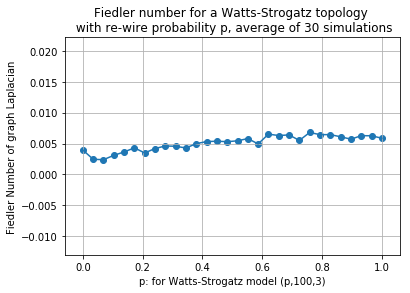

In [54]:
plt.scatter(np.linspace(0,1,len(F[0])),np.mean(F,axis=0))
plt.plot(np.linspace(0,1,len(F[0])),np.mean(F,axis=0))
plt.ylabel("Fiedler Number of graph Laplacian")
plt.xlabel("p: for Watts-Strogatz model (p,{0},{1})".format(100,3))
plt.title("Fiedler number for a Watts-Strogatz topology \n with re-wire probability p, average of {0} simulations".format(n_iterations))
plt.grid()
